In [2]:
%matplotlib inline

In [3]:

#system specifications

#import matplotlib

import matplotlib
import matplotlib.pyplot as plt
print('matplotlib: {}'.format( matplotlib.__version__))

from pandas.tools.plotting import scatter_matrix
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


# use pandas to import and manipulate data
import pandas as pd
import numpy as np
# use data spliter to simplfy the train and test data organisation
from sklearn.model_selection import train_test_split

# use random forest as the model, benfits from not needing the data scaled 
from sklearn.ensemble import RandomForestClassifier

# this library provides an easy way to pickle (save) python objects
from sklearn.externals import joblib


from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


matplotlib: 2.2.2


# Import the data

In [4]:

# Load dataset from the url
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class'] # we add the names to the columns
dataset = pd.read_csv(url, names=names) #notice we use pandas here to read the files


In [5]:
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
#check the shape
# how many features and samples are there in this 
dataset.shape

(150, 5)

In [8]:
#we see here a matrix of 150 rows and 5 columns
#Now we can take a look at a summary of each attribute.
#This includes the count, mean, the min and max values as well as some percentiles.

dataset.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
 #We can know how many classes there are in the data
# class distribution
print(dataset.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


# Plot

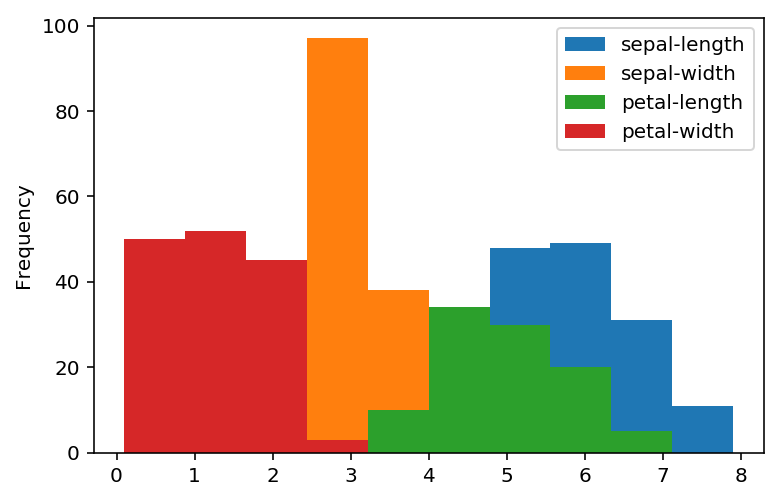

In [11]:
import seaborn as sns

# plot a histogram of all the features
dataset.plot(kind='hist')


/Users/zimine/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1bbfcc88>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1a1c2c2198>]], dtype=object)

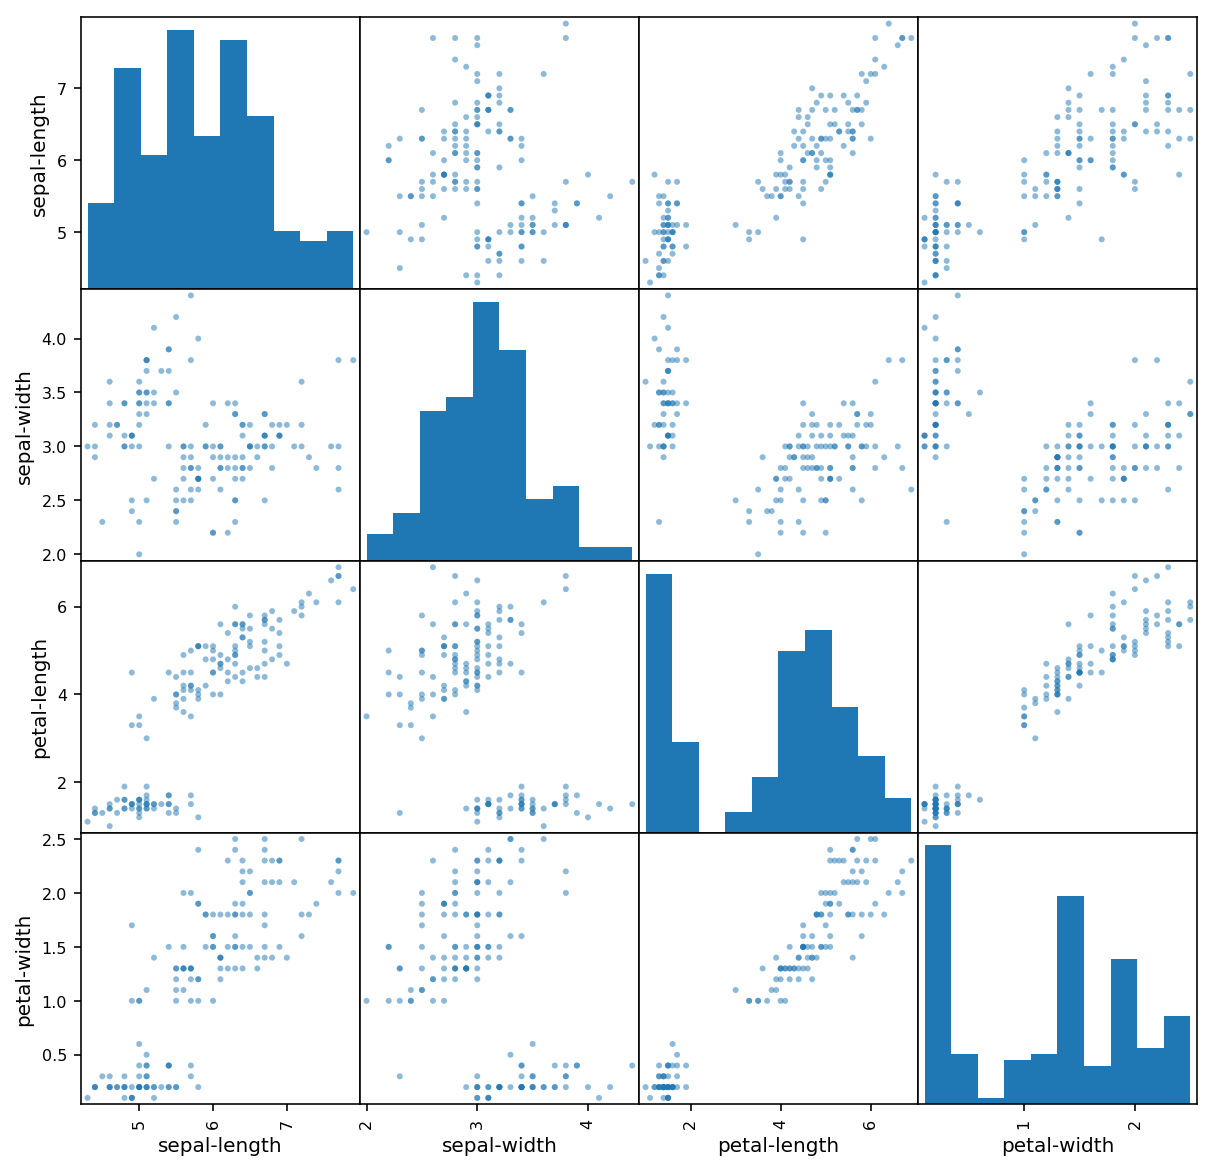

In [13]:
# plot a scatter matrix
scatter_matrix(dataset, figsize=(10,10) )

# Pre-process the data

In [14]:

#We first select the features:
array = dataset.values #y =dataset.target

#X = np.delete(array, -1, 1)
X = dataset.drop(columns=['class'])
y = dataset['class']




# Split the data

In [27]:
# split into test and training data

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=2)

# Learning 

In [28]:
# create model - We use Random Forest
clf = RandomForestClassifier()

# train model
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

# Test the model

In [29]:
#  check the score of the model /accurancy/ precision recall

clf.score(X_test, y_test)  #check for score method



0.97777777777777775

# Predict


In [31]:

predictions=clf.predict(X_test)

print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))#concepts
print(classification_report(y_test, predictions)) #concep


0.977777777778
[[17  0  0]
 [ 0 14  1]
 [ 0  0 13]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       1.00      0.93      0.97        15
 Iris-virginica       0.93      1.00      0.96        13

    avg / total       0.98      0.98      0.98        45

